In [53]:
import os
from PIL import Image
import cv2
from tqdm.notebook import tqdm

## Pseudocode

```
- counter = 0
- for each subfolder in images and annotations
	- load image
	- get width and height
	- load annotation
	- calculate yolo labels
	- save them to target dir with counter as filename
```

In [2]:
original_root = 'Data/Original/SyntheticTrain'
target_root = 'TextDetection/Train'

In [51]:
def convert_to_yolotxt(source_root, target_root):

    src_images_dir = os.path.join(source_root, 'Image')
    src_labels_dir = os.path.join(source_root, 'Annotation')

    tar_images_dir = os.path.join(target_root, 'images')
    tar_labels_dir = os.path.join(target_root, 'labels')

    # Create target directory structure
    os.makedirs(tar_images_dir, exist_ok=True)
    os.makedirs(tar_labels_dir, exist_ok=True)

    file_ctr = 0
    # Load Annotations and Images
    for img_subfolder, lbl_subfolder in tqdm(zip(os.listdir(src_images_dir), os.listdir(src_labels_dir)), total=len(os.listdir(src_images_dir))):
        img_subfolder_path = os.path.join(src_images_dir, img_subfolder)
        lbl_subfolder_path = os.path.join(src_labels_dir, lbl_subfolder)
        print(f'Currently in SubFolder {img_subfolder}')

        for img_file, lbl_file in tqdm(zip(os.listdir(img_subfolder_path), os.listdir(lbl_subfolder_path)), total=len(os.listdir(img_subfolder_path))):
            img_file_path = os.path.join(img_subfolder_path, img_file)
            lbl_file_path = os.path.join(lbl_subfolder_path, lbl_file)

            print(img_file_path, lbl_file_path)
            
            image = Image.open(img_file_path)

            with open(lbl_file_path, 'rb') as f:
                annotations = f.read().decode('utf-8').strip()
                annotations = annotations.split('\n')

            print(annotations)

            break
            
        break

In [ ]:
convert_to_yolotxt(original_root, target_root)

In [92]:
with open('1.txt', 'rb') as f:
    annotations = f.read().decode('utf-8').strip()
    annotations = annotations.split('\n')

In [93]:
image = cv2.imread('1.jpg')

In [94]:
def points(annotations):
    annotation_coords = []
    for annot in annotations:
        box = []
        annot = annot.split()[:-1]
        for x, y in zip(annot[:4], annot[4:]):
            box.append((int(float(x)), int(float(y))))
    
        annotation_coords.append(box)
    return annotation_coords


In [95]:
def draw_boxes(annotation_boxes):

    for box in annotation_boxes:
        cv2.line(image, box[0], box[1], (255, 0, 0), 3)
        cv2.line(image, box[1], box[2], (255, 0, 0), 3)
        cv2.line(image, box[2], box[3], (255, 0, 0), 3)
        cv2.line(image, box[3], box[0], (255, 0, 0), 3)


In [96]:
draw_boxes(points(annotations))

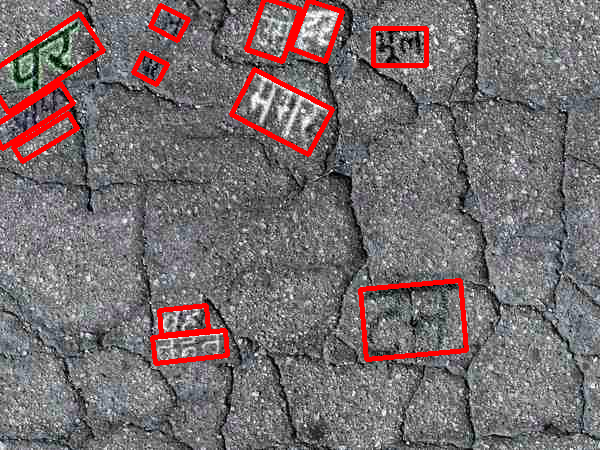

In [97]:
Image.fromarray(image)